In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import glob

In [ ]:
# os.getcwd()
# !unzip /content/Train_Image.zip

In [ ]:
path_lst=[]
for f in glob.glob('Train_Image/*.png'): ###train_image改成放所有圖片的資料夾
    path_lst.append(f)
path_lst.sort()
path_lst

['Train_Image/train_00000.png',
 'Train_Image/train_00001.png',
 'Train_Image/train_00002.png',
 'Train_Image/train_00003.png',
 'Train_Image/train_00004.png',
 'Train_Image/train_00005.png',
 'Train_Image/train_00006.png',
 'Train_Image/train_00007.png',
 'Train_Image/train_00008.png',
 'Train_Image/train_00009.png',
 'Train_Image/train_00010.png',
 'Train_Image/train_00011.png',
 'Train_Image/train_00012.png',
 'Train_Image/train_00013.png',
 'Train_Image/train_00014.png',
 'Train_Image/train_00015.png',
 'Train_Image/train_00016.png',
 'Train_Image/train_00017.png',
 'Train_Image/train_00018.png',
 'Train_Image/train_00019.png',
 'Train_Image/train_00020.png',
 'Train_Image/train_00021.png',
 'Train_Image/train_00022.png',
 'Train_Image/train_00023.png',
 'Train_Image/train_00024.png',
 'Train_Image/train_00025.png',
 'Train_Image/train_00026.png',
 'Train_Image/train_00027.png',
 'Train_Image/train_00028.png',
 'Train_Image/train_00029.png',
 'Train_Image/train_00030.png',
 'Train_

In [ ]:
import cv2
IMG_SIZE = 512 #(image resolution of 512 x 512 used for example)
X=[]
for i,image in enumerate(path_lst):
    img = cv2.cvtColor(cv2.imread(path_lst[i]),cv2.COLOR_BGR2GRAY)
    img = img.reshape(512,512,1).astype("float32")
    img = img/255
    X.append(img)

import numpy as np
X=np.asarray(X)

In [ ]:
import pandas as pd
df = pd.read_csv("AOI_train.csv")
y = df['Label']

In [ ]:
train=pd.read_csv("AOI_train.csv")
trainpath="Train_Image/" #where your train photos are

trainID=[]
trainLabel=[]

for i in range(len(train["ID"])):
    trainID.append(train["ID"][i])
    trainLabel.append(train["Label"][i])

In [ ]:
#Original Train Photos
alltrain=[]
for i in range(len(trainID)):
    alltrain.append(cv2.cvtColor(cv2.imread(trainpath+trainID[i]),cv2.COLOR_BGR2GRAY))

In [ ]:
print(np.array(alltrain).shape)
np.array(X).shape

(1500, 512, 512)


(1500, 512, 512, 1)

* load test image

In [ ]:
path_lst=[]
for f in glob.glob('Test_Image/*.png'):
    path_lst.append(f)
path_lst.sort()
path_lst

['Test_Image/test_00000.png',
 'Test_Image/test_00001.png',
 'Test_Image/test_00002.png',
 'Test_Image/test_00003.png',
 'Test_Image/test_00004.png',
 'Test_Image/test_00005.png',
 'Test_Image/test_00006.png',
 'Test_Image/test_00007.png',
 'Test_Image/test_00008.png',
 'Test_Image/test_00009.png',
 'Test_Image/test_00010.png',
 'Test_Image/test_00011.png',
 'Test_Image/test_00012.png',
 'Test_Image/test_00013.png',
 'Test_Image/test_00014.png',
 'Test_Image/test_00015.png',
 'Test_Image/test_00016.png',
 'Test_Image/test_00017.png',
 'Test_Image/test_00018.png',
 'Test_Image/test_00019.png',
 'Test_Image/test_00020.png',
 'Test_Image/test_00021.png',
 'Test_Image/test_00022.png',
 'Test_Image/test_00023.png',
 'Test_Image/test_00024.png',
 'Test_Image/test_00025.png',
 'Test_Image/test_00026.png',
 'Test_Image/test_00027.png',
 'Test_Image/test_00028.png',
 'Test_Image/test_00029.png',
 'Test_Image/test_00030.png',
 'Test_Image/test_00031.png',
 'Test_Image/test_00032.png',
 'Test_Ima

In [ ]:
import cv2
IMG_SIZE = 512 #(image resolution of 512 x 512 used for example)
X_test=[]
for i,image in enumerate(path_lst):
    img = cv2.cvtColor(cv2.imread(path_lst[i]),cv2.COLOR_BGR2GRAY)
    img = img.reshape(512,512,1).astype("float32")
    img = img/255
    X_test.append(img)

import numpy as np
X_test=np.asarray(X_test)

In [ ]:
test=pd.read_csv("AOI_test_check.csv")
testpath="Test_Image/" #where your train photos are

testID=[]

for i in range(len(test["ID"])):
    testID.append(test["ID"][i])

In [ ]:
#Original Train Photos
alltest=[]
for i in range(len(testID)):
    alltest.append(cv2.cvtColor(cv2.imread(testpath+testID[i]),cv2.COLOR_BGR2GRAY))

In [ ]:
np.array(alltest).shape

(1000, 512, 512)

In [ ]:
import numpy as np
import pandas as pd

import mahotas
import cv2
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense , Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.activations import relu
from keras.activations import softmax
from keras.models import Sequential


* Split data into train & val

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [ ]:
# 8 edition
def main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE) :
    model = Sequential()
    model.add(Conv2D(filters=12,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    #shape(None,512,512,12),param~18000
    model.add(MaxPooling2D(pool_size=(2,2)))
    #shape(None,256,256,12)
    model.add(Conv2D(filters=24,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    #shape(None,256,256,24),param~36000
    model.add(MaxPooling2D(pool_size=(2,2)))
    #shape(None,128,128,24)
    model.add(Conv2D(filters=36,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    #shape(None,128,128,36),param~54000
    model.add(MaxPooling2D(pool_size=(2,2)))
    #shape(None,64,64,36)
    model.add(Conv2D(filters=48,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    #shape(None,64,64,48),param~72000
    model.add(MaxPooling2D(pool_size=(2,2)))
    #shape(None,32,32,48)
    model.add(Conv2D(filters=60,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    #shape(None,32,32,60),param~108000
    model.add(MaxPooling2D(pool_size=(2,2)))
    #shape(None,16,16,60)
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #shape(None,15360)

    model.add(Dense(256,activation="relu"))
    #shape(None,256),param~3932160

    model.add(Dropout(0.25))

    model.add(Dense(6,activation="softmax"))
    #shape(None,6),param~768

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    history = model.fit(x = X_train , y = y_train , validation_data = (X_val , y_val) , batch_size=BATCH_SIZE,epochs=EPOCHS)
    ypreds = np.argmax(model.predict(X_val) , axis = 1)
    acc = accuracy_score(y_val , ypreds)
    conf_mat = pd.crosstab(y_val , ypreds , rownames=["label"], colnames=["predict"])

    return model , acc , history , conf_mat

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

# ------------------------------------------------------------------------------------------------
# different random_state

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model , acc , history , conf_mat = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc)
model.save('/home/re6101029/AOI/AOI/model2conv.h5')
conf_mat

Epoch 1/100
38/38 [==============================] - 42s 1s/step - loss: 1.6625 - accuracy: 0.2775 - val_loss: 1.5862 - val_accuracy: 0.3900
Epoch 2/100
38/38 [==============================] - 43s 1s/step - loss: 1.5612 - accuracy: 0.3508 - val_loss: 1.3640 - val_accuracy: 0.4767
Epoch 3/100
38/38 [==============================] - 43s 1s/step - loss: 1.2306 - accuracy: 0.4925 - val_loss: 1.3752 - val_accuracy: 0.3433
Epoch 4/100
38/38 [==============================] - 43s 1s/step - loss: 1.0811 - accuracy: 0.5475 - val_loss: 0.9611 - val_accuracy: 0.6167
Epoch 5/100
38/38 [==============================] - 43s 1s/step - loss: 0.9979 - accuracy: 0.6108 - val_loss: 1.5369 - val_accuracy: 0.3000
Epoch 6/100
38/38 [==============================] - 43s 1s/step - loss: 0.9523 - accuracy: 0.6542 - val_loss: 0.9078 - val_accuracy: 0.6800
Epoch 7/100
38/38 [==============================] - 42s 1s/step - loss: 0.8493 - accuracy: 0.6858 - val_loss: 0.8640 - val_accuracy: 0.6467
Epoch 8/100
3

predict   0   1   2   3   4   5
label                          
0        70   1   0   1   0   0
1         2  61   0   1   0   0
2         3   0  19   0   0   0
3         2   1   0  30   1   0
4         0   0   0   1  22   0
5         0   3   0   0   0  82

In [ ]:
ypreds = np.argmax(model.predict(X_test) , axis = 1)
test_df = pd.DataFrame(ypreds , columns=['Label'])
test_df
#drive.mount('/content/drive')
#test_df.to_csv('content/drive/MyDrive/project_AOI/CNN_test.csv')


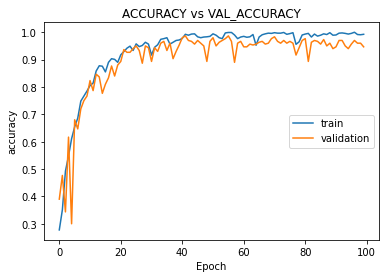

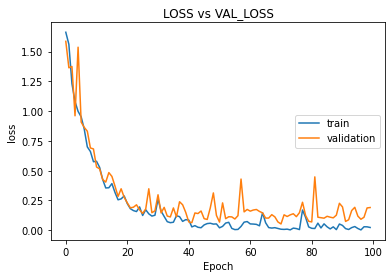

In [ ]:
#train與test dataset訓練過程的誤差率
def show_train_history(history , train, validation):

    plt.plot(history.history[train])

    plt.plot(history.history[validation])

    plt.title("%s vs %s" % (train.upper() , validation.upper()))

    plt.ylabel("%s" % train)

    plt.xlabel("Epoch")

    plt.legend(["train" , "validation"] , loc = "center right")

    plt.show()

show_train_history(history , "accuracy" , "val_accuracy")
show_train_history(history , "loss" , "val_loss")

In [ ]:
# 7 edition
def main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE) :
    model = Sequential()
    model.add(Conv2D(filters=24,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=48,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    
    model.add(Dense(128,activation="relu"))
    model.add(Dense(6,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.fit(x = X_train , y = y_train , validation_data = (X_val , y_val) , batch_size=BATCH_SIZE,epochs=EPOCHS)
    ypreds = np.argmax(model.predict(X_val) , axis = 1) + 1
    acc = accuracy_score(y_val , ypreds)

    return model , acc

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

# ------------------------------------------------------------------------------------------------
# different random_state

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model , acc = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc)

Epoch 1/10
38/38 [==============================] - 230s 6s/step - loss: 2.3585 - accuracy: 0.3375 - val_loss: 1.2736 - val_accuracy: 0.4767
Epoch 2/10
38/38 [==============================] - 230s 6s/step - loss: 1.2507 - accuracy: 0.4683 - val_loss: 1.1715 - val_accuracy: 0.5500
Epoch 3/10
38/38 [==============================] - 231s 6s/step - loss: 1.2574 - accuracy: 0.4967 - val_loss: 1.0737 - val_accuracy: 0.6133
Epoch 4/10
38/38 [==============================] - 231s 6s/step - loss: 1.0482 - accuracy: 0.5883 - val_loss: 1.1189 - val_accuracy: 0.5800
Epoch 5/10
38/38 [==============================] - 231s 6s/step - loss: 0.9958 - accuracy: 0.6200 - val_loss: 1.0419 - val_accuracy: 0.5533
Epoch 6/10
38/38 [==============================] - 231s 6s/step - loss: 0.9143 - accuracy: 0.6558 - val_loss: 1.0307 - val_accuracy: 0.5433
Epoch 7/10
38/38 [==============================] - 232s 6s/step - loss: 0.7648 - accuracy: 0.7250 - val_loss: 0.7619 - val_accuracy: 0.7167
Epoch 8/10
38

In [ ]:
# 6 edition
def main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE) :
    model = Sequential()
    model.add(Conv2D(filters=12,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=24,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=36,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=48,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=60,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=72,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=84,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=96,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=108,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Dropout(0.25))

    model.add(Flatten())
    
    #如果256不能跑就改回128
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.25))
    #這個128的Dense如果有error就刪掉
    model.add(Dense(128,activation="relu"))
    model.add(Dense(6,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.fit(x = X_train , y = y_train , validation_data = (X_val , y_val) , batch_size=BATCH_SIZE,epochs=EPOCHS)
    ypreds = np.argmax(model.predict(X_val) , axis = 1) + 1
    acc = accuracy_score(y_val , ypreds)

    return model , acc

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

# ------------------------------------------------------------------------------------------------
# different random_state

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model , acc = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc)
model.save('/home/re6101029/AOI/AOI/model.h5')

Epoch 1/100
38/38 [==============================] - 43s 1s/step - loss: 1.6818 - accuracy: 0.2592 - val_loss: 1.6503 - val_accuracy: 0.2833
Epoch 2/100
38/38 [==============================] - 42s 1s/step - loss: 1.6362 - accuracy: 0.2600 - val_loss: 1.6894 - val_accuracy: 0.2400
Epoch 3/100
38/38 [==============================] - 42s 1s/step - loss: 1.5705 - accuracy: 0.3475 - val_loss: 1.7214 - val_accuracy: 0.2400
Epoch 4/100
38/38 [==============================] - 42s 1s/step - loss: 1.6655 - accuracy: 0.2517 - val_loss: 1.7160 - val_accuracy: 0.2400
Epoch 5/100
38/38 [==============================] - 42s 1s/step - loss: 1.6587 - accuracy: 0.2583 - val_loss: 1.6979 - val_accuracy: 0.2400
Epoch 6/100
38/38 [==============================] - 43s 1s/step - loss: 1.6561 - accuracy: 0.2692 - val_loss: 1.6965 - val_accuracy: 0.2400
Epoch 7/100
38/38 [==============================] - 42s 1s/step - loss: 1.6546 - accuracy: 0.2525 - val_loss: 1.7022 - val_accuracy: 0.2400
Epoch 8/100
3

In [ ]:
# 5 edition
def main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE) :
    model = Sequential()
    model.add(Conv2D(filters=24,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=36,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=48,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=60,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=72,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Dropout(0.25))

    model.add(Flatten())
    
    #如果256不能跑就改回128
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(6,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.fit(x = X_train , y = y_train , validation_data = (X_val , y_val) , batch_size=BATCH_SIZE,epochs=EPOCHS)
    ypreds = np.argmax(model.predict(X_val) , axis = 1) + 1
    acc = accuracy_score(y_val , ypreds)

    return model , acc

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

# ------------------------------------------------------------------------------------------------
# different random_state

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model , acc = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc)
model.save('/home/re6101029/AOI/AOI/model.h5')

Epoch 1/10
38/38 [==============================] - 71s 2s/step - loss: 1.5708 - accuracy: 0.3250 - val_loss: 1.4294 - val_accuracy: 0.3767
Epoch 2/10
38/38 [==============================] - 71s 2s/step - loss: 1.2193 - accuracy: 0.4958 - val_loss: 1.1080 - val_accuracy: 0.5200
Epoch 3/10
38/38 [==============================] - 71s 2s/step - loss: 1.1354 - accuracy: 0.5017 - val_loss: 1.0549 - val_accuracy: 0.5900
Epoch 4/10
38/38 [==============================] - 72s 2s/step - loss: 1.1833 - accuracy: 0.5167 - val_loss: 1.0721 - val_accuracy: 0.6267
Epoch 5/10
38/38 [==============================] - 72s 2s/step - loss: 1.0015 - accuracy: 0.5883 - val_loss: 0.9864 - val_accuracy: 0.5967
Epoch 6/10
38/38 [==============================] - 72s 2s/step - loss: 0.9109 - accuracy: 0.6433 - val_loss: 0.8132 - val_accuracy: 0.6900
Epoch 7/10
38/38 [==============================] - 72s 2s/step - loss: 0.8194 - accuracy: 0.6967 - val_loss: 0.8423 - val_accuracy: 0.6633
Epoch 8/10
38/38 [==

In [ ]:
# 4 edition
def main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE) :
    model = Sequential()
    model.add(Conv2D(filters=16,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=36,
                    kernel_size=(3,3),
                    padding="same",
                    input_shape=(512,512,1),
                    activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128,activation="relu"))
    model.add(Dense(6,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.fit(x = X_train , y = y_train , validation_data = (X_val , y_val) , batch_size=BATCH_SIZE,epochs=EPOCHS)
    ypreds = np.argmax(model.predict(X_val) , axis = 1) + 1
    acc = accuracy_score(y_val , ypreds)

    return model , acc

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

# ------------------------------------------------------------------------------------------------
# different random_state

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model0 , acc0 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc0)
model0.save('/home/re6101029/AOI/AOI/model0.h5')

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 1)
model1 , acc1 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc1)
model1.save('/home/re6101029/AOI/AOI/model1.h5')

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 2)
model2 , acc2 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc2)
model2.save('/home/re6101029/AOI/AOI/model2.h5')

# ------------------------------------------------------------------------------------------------
# different test size

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.2 , random_state = 0)
model02 , acc02 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc02)
model02.save('/home/re6101029/AOI/AOI/model02.h5')

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.25 , random_state = 0)
model025 , acc025 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc025)
model025.save('/home/re6101029/AOI/AOI/model025.h5')

X_train , X_val , y_train , y_val = train_test_split(X , y , test_size = 0.3 , random_state = 0)
model03 , acc03 = main(X_train , y_train , X_val , y_val , EPOCHS , BATCH_SIZE)
print(acc03)
model03.save('/home/re6101029/AOI/AOI/model03.h5')

Epoch 1/100
38/38 [==============================] - 48s 1s/step - loss: 4.9580 - accuracy: 0.3075 - val_loss: 1.4143 - val_accuracy: 0.4733
Epoch 2/100
38/38 [==============================] - 48s 1s/step - loss: 1.3208 - accuracy: 0.4583 - val_loss: 1.4165 - val_accuracy: 0.3700
Epoch 3/100
38/38 [==============================] - 48s 1s/step - loss: 1.0893 - accuracy: 0.5383 - val_loss: 1.2129 - val_accuracy: 0.5500
Epoch 4/100
38/38 [==============================] - 48s 1s/step - loss: 1.0669 - accuracy: 0.5575 - val_loss: 1.2019 - val_accuracy: 0.5333
Epoch 5/100
38/38 [==============================] - 48s 1s/step - loss: 0.9569 - accuracy: 0.5950 - val_loss: 1.1808 - val_accuracy: 0.5267
Epoch 6/100
38/38 [==============================] - 48s 1s/step - loss: 0.8539 - accuracy: 0.6883 - val_loss: 0.8916 - val_accuracy: 0.6867
Epoch 7/100
38/38 [==============================] - 49s 1s/step - loss: 0.7088 - accuracy: 0.7433 - val_loss: 1.2222 - val_accuracy: 0.6700
Epoch 8/100
3

KeyboardInterrupt: 

In [ ]:
ypreds = np.argmax(model.predict(X_val) , axis = 1) + 1
acc = accuracy_score(y_val , ypreds)
acc


0.07

In [ ]:
model.save('/home/re6101029/AOI/AOI/100epochs.h5')

In [ ]:
# 3 edition
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="softmax"))

model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="softmax"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X,y,batch_size=32,epochs=1)

47/47 [==============================] - 315s 7s/step - loss: 14.1513 - accuracy: 0.0027


In [ ]:
# 2 edition
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))

model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1,activation="softmax"))



model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X , y , batch_size = 32 , epochs = 5)

Epoch 1/5
47/47 [==============================] - 178s 4s/step - loss: 0.0000e+00 - accuracy: 0.2020
Epoch 2/5
47/47 [==============================] - 178s 4s/step - loss: 0.0000e+00 - accuracy: 0.2020
Epoch 3/5
47/47 [==============================] - 178s 4s/step - loss: 0.0000e+00 - accuracy: 0.2020
Epoch 4/5
42/47 [=========================>....] - ETA: 19s - loss: 0.0000e+00 - accuracy: 0.2068

KeyboardInterrupt: 

In [ ]:
# 1 edition
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                padding="same",
                input_shape=(512,512,1),
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X , y , batch_size = 32 , epochs = 1)

47/47 [==============================] - 156s 3s/step - loss: 0.0000e+00 - accuracy: 0.2020


In [ ]:
# #[conv2D->pooling]*5->merge->flatten->Dense(relu)->Dense(softmax)->compile->fit
# model1 = Sequential()
# model1.add(Conv2D(filters=32,
#                 kernel_size=(3,3),
#                 padding="same",
#                 input_shape=(512,512,1),
#                 activation="relu"))
# model1.add(MaxPooling2D(pool_size=(2,2),padding="same"))


# model2 = Sequential()
# model2.add(Conv2D(filters=64,
#                 kernel_size=(3,3),
#                 padding="same",
#                 input_shape=(512,512,1),
#                 activation="relu"))
# model2.add(MaxPooling2D(pool_size=(2,2)))


# model3 = Sequential()
# model3.add(Conv2D(filters=128,
#                 kernel_size=(3,3),
#                 padding="same",
#                 input_shape=(512,512,1),
#                 activation="relu"))
# model3.add(MaxPooling2D(pool_size=(2,2),padding="same"))


# model4 = Sequential()
# model4.add(Conv2D(filters=256,
#                 kernel_size=(3,3),
#                 padding="same",
#                 input_shape=(512,512,1),
#                 activation="relu"))
# model4.add(MaxPooling2D(pool_size=(2,2),padding="same"))


# merge = concatenate([model1.output, model2.output], axis=-1)
# merge = concatenate([merge, model3.output], axis=-1)
# merge = concatenate([merge, model4.output], axis=-1)
# merge = Flatten()(merge)
# merge = Dense(1, activation='relu')(merge)
# merge = Dense(1, activation='softmax')(merge)

# model = Model(inputs=[model1.input, model2.input], outputs=merge)

# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# train_model=model.fit(x=[X,X],y=y,validation_split=0.2,epochs=5,batch_size=100,verbose=True)